In [1]:
from typing import List, Tuple

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def apply_sobel_filter(
        image_path: str,
        salt_prob: float = 0.0,
        pepper_prob: float = 0.0,
    )-> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """Applies the Sobel filter in X and Y to a input image and returns each
    step.

    Args:
        image_path (str): Path to the input image
        salt_prob (float): Probability of changing a pixel to salt. Value from
            0.0 to 1.0. Defaults to 0.0.
        pepper_prob (float): Probability of changing a pixel to pepper. Value
            from 0.0 to 1.0. Defaults to 0.0.

    Returns:
        Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray, np.ndarray]: A
            tuple containing the grayscale image, the grayscale image with salt
            and pepper noise, the sobel in x, the sobel in y, and the sobel
            combining x and y.
    """
    # Read the image
    image: np.ndarray = cv2.imread(image_path)

    # BGR to grayscale
    gray_img: np.ndarray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Noisy image
    noisy_img: np.ndarray = np.copy(gray_img)

    salt_num: int = int(np.ceil(salt_prob * noisy_img.size))
    pepper_num: int = int(np.ceil(pepper_prob * noisy_img.size))

    salt_coords: List[np.ndarray] = [
        np.random.randint(0, i, salt_num) for i in image.shape
    ]
    pepper_coords: List[np.ndarray] = [
        np.random.randint(0, i, pepper_num) for i in image.shape
    ]

    noisy_img[salt_coords[0], salt_coords[1]] = 255
    noisy_img[pepper_coords[0], pepper_coords[1]] = 0

    # Apply Sobel in x direction
    sobel_x_img: np.ndarray = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=3)
    sobel_x_uint8: np.ndarray = np.uint8(np.absolute(sobel_x_img))

    # Apply Sobel in y direction
    sobel_y_img: np.ndarray = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=3)
    sobel_y_uint8: np.ndarray = np.uint8(np.absolute(sobel_y_img))

    # Combine sobel
    sobel_combined_img: np.ndarray = cv2.magnitude(sobel_x_img, sobel_y_img)

    # Convert to 8-bit image
    sobel_combined_uint8: np.ndarray = np.uint8(
        np.absolute(sobel_combined_img)
    )

    # Display the results
    plt.figure(figsize=(10, 8))

    plt.subplot(2, 3, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.title('Grayscale Image')
    plt.imshow(gray_img, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.title('Noisy Image')
    plt.imshow(noisy_img, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 3, 4)
    plt.title('Sobel X')
    plt.imshow(np.uint8(np.absolute(sobel_x_img)), cmap='gray')
    plt.axis('off')

    plt.subplot(2, 3, 5)
    plt.title('Sobel Y')
    plt.imshow(np.uint8(np.absolute(sobel_y_img)), cmap='gray')
    plt.axis('off')

    plt.subplot(2, 3, 6)
    plt.title('Sobel Combined')
    plt.imshow(sobel_combined_uint8, cmap='gray')
    plt.axis('off')

    plt.show()

    return (gray_img, noisy_img, sobel_x_uint8, sobel_y_uint8,
            sobel_combined_uint8)

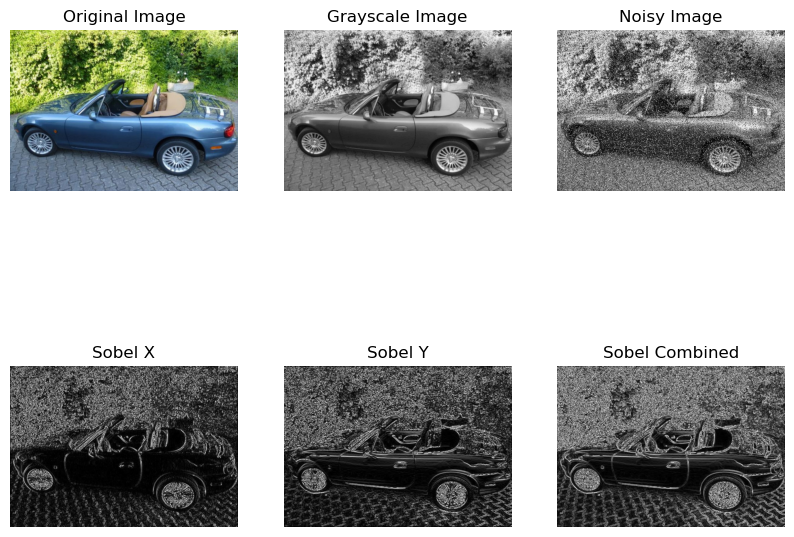

In [6]:
if __name__ == '__main__':
    # Change this for the value you want
    salt_probability: float = 0.1
    pepper_probability: float = 0.1
    img_name: str = 'car'
    img_ext: str = 'jpg'

    # Don't touch from this line
    img_path: str = f'src/imgs/{img_name}.{img_ext}'
    gray, noisy, sobel_x, sobel_y, sobel_combined = \
        apply_sobel_filter(img_path, salt_probability, pepper_probability)

    cv2.imwrite(f'src/imgs/{img_name}_grayscale_image.{img_ext}', gray)
    cv2.imwrite(f'src/imgs/{img_name}_noisy_image.{img_ext}', noisy)
    cv2.imwrite(
        f'src/imgs/{img_name}_sobel_x_result.{img_ext}',
        np.uint8(np.absolute(sobel_x))
    )
    cv2.imwrite(
        f'src/imgs/{img_name}_sobel_y_result.{img_ext}',
        np.uint8(np.absolute(sobel_y))
    )
    cv2.imwrite(
        f'src/imgs/{img_name}_sobel_combined_result.{img_ext}',
        sobel_combined
    )